# Applied Machine Learning

- [Random Forest Classification](#Random-Forest-Classification)
  - [RF Stress Level](#RF-Stress-Level)
  - [RF Depression](#RF-Depression)
- [Feature Importance](#Feature-Importance)
- [Testing Models](#Testing-Models)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("../Data/Mental Health Cleaned Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    85 non-null     int64  
 1   Age                       85 non-null     int64  
 2   University                85 non-null     object 
 3   Degree Level              85 non-null     int64  
 4   Year                      85 non-null     int64  
 5   Course                    85 non-null     object 
 6   CGPA                      85 non-null     float64
 7   Residential Status        85 non-null     int64  
 8   Campus Mistreat           85 non-null     int64  
 9   Sports                    85 non-null     int64  
 10  Sleep                     85 non-null     int64  
 11  Field Satisfaction        85 non-null     int64  
 12  Uni Workload              85 non-null     int64  
 13  Academic Pressure         85 non-null     int64  
 14  Financial Pr

In [4]:
df.sample(5)

,Gender,Age,University,Degree Level,Year,Course,CGPA,Residential Status,Campus Mistreat,Sports,...,Financial Pressure,Campus Networking,Depression,Anxiety,Isolation,Future Insecurity,Stress Relief Activities,Field Stress,Stress Score,Stress Level
47,0,20,PU,0,3,Data Science,3.5,0,1,1,...,1,1,3,3,5,2,['Entertainment'],2,20,1
26,0,23,PU,0,2,Data Science,2.5,0,1,2,...,1,4,3,3,2,3,"['Religious', 'Entertainment', 'Outdoor']",3,18,1
50,0,21,PU,0,2,Data Science,3.5,1,0,2,...,4,5,2,2,2,3,"['Religious', 'Social Connections', 'Entertain...",1,18,1
34,1,17,PU,0,1,Computer Science,3.5,1,0,1,...,5,1,5,5,5,3,['Sleep'],2,30,2
46,0,21,PU,0,4,Software Engineering,3.5,0,1,2,...,4,3,5,5,5,5,"['Religious', 'Fitness', 'Creative Outlets', '...",3,31,2


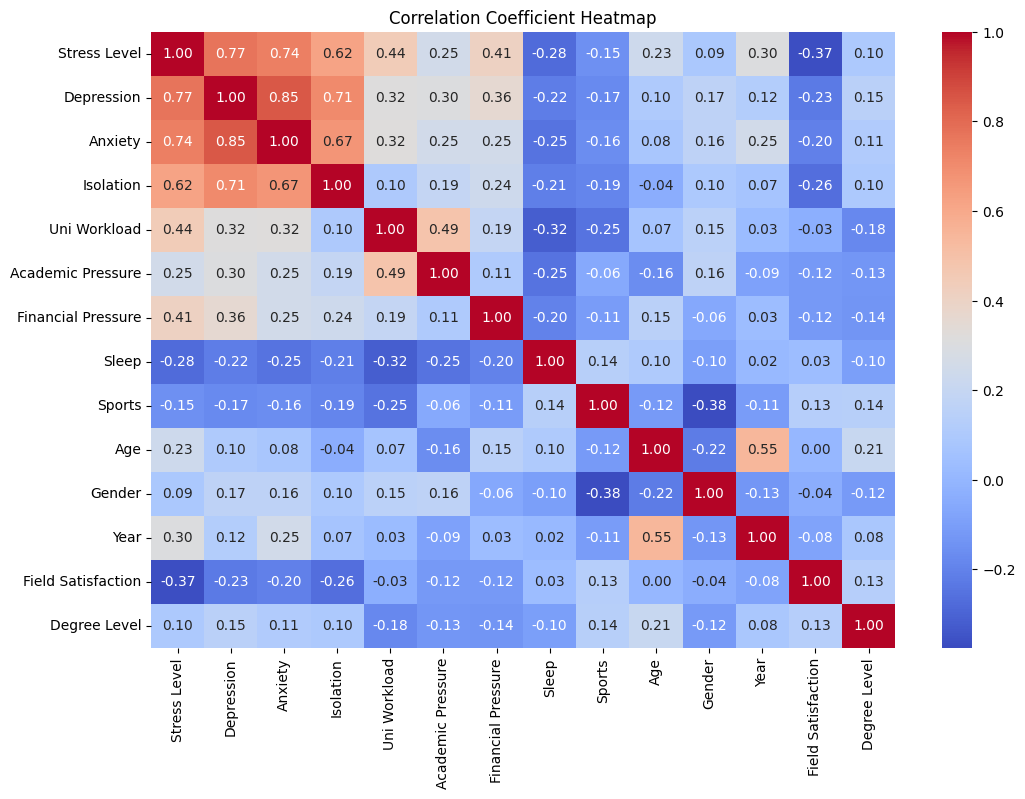

In [5]:
x = df[
    ['Gender', 'Age', 'Degree Level', 'Year', 'Sports', 'Sleep', 'Field Satisfaction', 'Uni Workload',
     'Academic Pressure', 'Financial Pressure', 'Depression', 'Anxiety', 'Isolation', 'Stress Level']
]

correlation_matrix = x.corr()

# Sort columns based on their overall correlation
sorted_columns = correlation_matrix.abs().sum(axis=0).sort_values(ascending=False).index
correlation_matrix = correlation_matrix.reindex(index=sorted_columns, columns=sorted_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Coefficient Heatmap")
plt.show()

## Random Forest Classification

- [RF Stress Level](#RF-Stress-Level)
- [RF Depression](#RF-Depression)

In [6]:
X = df.drop(
    ['Stress Level', 'Depression', 'University', 'Course', 'Stress Relief Activities', 'Field Stress'], axis=1
)

y1 = df['Stress Level']
y2 = df['Depression']

In [7]:
X.columns

Index(['Gender', 'Age', 'Degree Level', 'Year', 'CGPA', 'Residential Status',
       'Campus Mistreat', 'Sports', 'Sleep', 'Field Satisfaction',
       'Uni Workload', 'Academic Pressure', 'Financial Pressure',
       'Campus Networking', 'Anxiety', 'Isolation', 'Future Insecurity',
       'Stress Score'],
      dtype='object')

In [8]:
df['Stress Level'].skew(), df['Depression'].skew()

(0.00414520161104489, -0.27181368258283406)

In [9]:
def find_best_n_estimators(X, y, cv=5):
    n_estimators_values = [
        10, 20, 50, 100, 200, 500, 1000
    ]
    cv_scores = {}

    for n_estimators in n_estimators_values:
        rf_model = RandomForestClassifier(n_estimators=n_estimators)
        scores = cross_val_score(rf_model, X, y, cv=cv)
        cv_scores[n_estimators] = scores.mean()

    return cv_scores

### RF Stress Level

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=y1, random_state=42)

In [11]:
X1_train.head()

,Gender,Age,Degree Level,Year,CGPA,Residential Status,Campus Mistreat,Sports,Sleep,Field Satisfaction,Uni Workload,Academic Pressure,Financial Pressure,Campus Networking,Anxiety,Isolation,Future Insecurity,Stress Score
15,1,19,0,1,3.0,0,1,1,3,5,3,3,4,3,1,1,3,14
55,0,21,0,2,2.5,1,1,3,2,3,4,5,3,4,1,1,1,14
40,1,19,0,2,2.5,0,0,2,2,4,4,4,4,1,1,1,4,17
19,0,19,0,1,3.5,0,1,2,2,5,4,4,5,3,5,4,3,27
67,0,20,0,3,2.5,0,0,2,2,4,5,5,1,5,4,1,1,17


In [18]:
find_best_n_estimators(X, y1)

{10: 0.9529411764705882,
 20: 0.9176470588235294,
 50: 0.9647058823529411,
 100: 0.9647058823529411,
 200: 0.9529411764705882,
 500: 0.9529411764705882,
 1000: 0.9647058823529411}

In [56]:
rf_stress_level = RandomForestClassifier(n_estimators=10)
rf_stress_level.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=10)

In [57]:
y1_pred = rf_stress_level.predict(X1_test)
y1_pred

array([0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
print("Stress Level Classification Report:")
print(classification_report(y1_test, y1_pred))

Stress Level Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.92      1.00      0.96        12
           2       1.00      0.67      0.80         3

    accuracy                           0.94        17
   macro avg       0.97      0.89      0.92        17
weighted avg       0.95      0.94      0.94        17



In [59]:
accuracy_score(y1_test, y1_pred)

0.9411764705882353

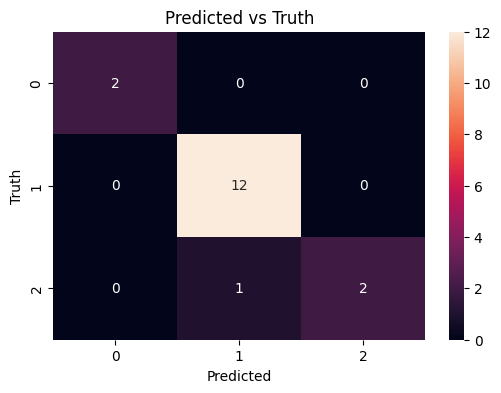

In [60]:
cm = confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True)

plt.title('Predicted vs Truth')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [61]:
# Save model
dump(rf_stress_level, '../FastAPI Workspace/model/rfStressLevel.joblib')

['../FastAPI Workspace/model/rfStressLevel.joblib']

In [62]:
feature1 = pd.DataFrame(
    {'Feature': X.columns, 'Importance1': rf_stress_level.feature_importances_}
)

feature_stress_level = feature1.sort_values(
    by='Importance1', ascending=False
)

print("\nFeature Importances for Stress Level:")
print(feature_stress_level)


Feature Importances for Stress Level:
               Feature  Importance1
17        Stress Score     0.347131
14             Anxiety     0.137841
16   Future Insecurity     0.097532
15           Isolation     0.087339
12  Financial Pressure     0.086818
10        Uni Workload     0.055727
1                  Age     0.047788
13   Campus Networking     0.043692
5   Residential Status     0.019680
4                 CGPA     0.016771
6      Campus Mistreat     0.016027
9   Field Satisfaction     0.012168
11   Academic Pressure     0.009737
7               Sports     0.006661
8                Sleep     0.005886
0               Gender     0.004317
3                 Year     0.002586
2         Degree Level     0.002297


### RF Depression

In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, stratify=y2, random_state=42)

In [27]:
X2_train.head()

,Gender,Age,Degree Level,Year,CGPA,Residential Status,Campus Mistreat,Sports,Sleep,Field Satisfaction,Uni Workload,Academic Pressure,Financial Pressure,Campus Networking,Anxiety,Isolation,Future Insecurity,Stress Score
30,0,18,0,1,3.5,0,0,1,3,5,3,1,1,3,2,2,1,11
62,0,20,0,3,3.0,0,0,2,2,3,4,3,4,1,2,1,3,18
5,1,20,0,3,3.0,0,0,1,2,4,5,5,3,3,5,5,5,30
68,0,20,0,3,3.5,1,0,1,2,4,5,5,3,3,2,3,3,20
73,1,20,0,3,3.5,0,0,1,2,5,4,5,4,1,5,5,4,27


In [28]:
find_best_n_estimators(X, y2, cv=10)

{10: 0.5777777777777778,
 20: 0.6027777777777777,
 50: 0.6166666666666667,
 100: 0.6680555555555555,
 200: 0.6888888888888889,
 500: 0.6902777777777779,
 1000: 0.6902777777777779}

In [33]:
rf_depression = RandomForestClassifier(n_estimators=500)
rf_depression.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=500)

In [34]:
y2_pred = rf_depression.predict(X2_test)
y2_pred

array([1, 5, 4, 4, 3, 3, 3, 5, 2, 3, 4, 1, 4, 4, 3, 4, 3], dtype=int64)

In [35]:
print("Depression Classification Report:")
print(classification_report(y2_test, y2_pred))

Depression Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.33      0.50         3
           3       0.50      0.75      0.60         4
           4       0.67      1.00      0.80         4
           5       1.00      0.50      0.67         4

    accuracy                           0.71        17
   macro avg       0.83      0.72      0.71        17
weighted avg       0.80      0.71      0.69        17



In [36]:
accuracy_score(y2_test, y2_pred)

0.7058823529411765

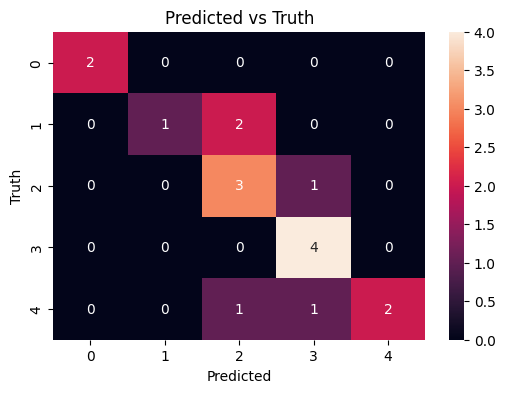

In [37]:
cm = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True)

plt.title('Predicted vs Truth')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [38]:
# Save model
dump(rf_depression, '../FastAPI Workspace/model/rfDepression.joblib')

['../FastAPI Workspace/model/rfDepression.joblib']

In [39]:
feature2 = pd.DataFrame(
    {'Feature': X.columns, 'Importance2': rf_depression.feature_importances_}
)

feature_depression = feature2.sort_values(
    by='Importance2', ascending=False
)

print("\nFeature Importances for Depression:")
print(feature_depression)


Feature Importances for Depression:
               Feature  Importance2
17        Stress Score     0.202859
14             Anxiety     0.194291
15           Isolation     0.088495
16   Future Insecurity     0.063040
12  Financial Pressure     0.059749
13   Campus Networking     0.045953
11   Academic Pressure     0.043430
10        Uni Workload     0.038795
7               Sports     0.036008
4                 CGPA     0.035283
3                 Year     0.034036
9   Field Satisfaction     0.034019
1                  Age     0.030481
8                Sleep     0.029841
0               Gender     0.025935
6      Campus Mistreat     0.023328
5   Residential Status     0.011756
2         Degree Level     0.002702


## Feature Importance

In [40]:
df_merged = pd.merge(
    feature1, feature2, on='Feature', how='outer'
).fillna(0)

df_merged['Total Importance'] = df_merged['Importance1'] + df_merged['Importance2']

df_merged.sort_values(by='Total Importance', ascending=False)

,Feature,Importance1,Importance2,Total Importance
17,Stress Score,0.430012,0.202859,0.632871
14,Anxiety,0.168489,0.194291,0.362780
15,Isolation,0.083676,0.088495,0.172170
16,Future Insecurity,0.071665,0.063040,0.134705
11,Academic Pressure,0.058642,0.043430,0.102072
13,Campus Networking,0.032332,0.045953,0.078285
12,Financial Pressure,0.015470,0.059749,0.075219
7,Sports,0.032294,0.036008,0.068301
3,Year,0.032623,0.034036,0.066659
10,Uni Workload,0.021058,0.038795,0.059852


## Testing Models

In [90]:
data = {
    'Gender': [0],
    'Age': [20],
    'Degree Level': [0], 
    'Year': [2], 
    'CGPA': [3.0], 
    'Residential Status': [0],
    'Campus Mistreat': [1], 
    'Sports': [2], 
    'Sleep': [3], 
    'Field Satisfaction': [3],
    'Uni Workload': [3], 
    'Academic Pressure': [3], 
    'Financial Pressure': [5],
    'Campus Networking': [3], 
    'Anxiety': [2], 
    'Isolation': [2], 
    'Future Insecurity': [4],
    'Stress Score': [25]
}

data = pd.DataFrame(data)

In [91]:
model_stress_level = load('../FastAPI Workspace/model/rfStressLevel.joblib')

prediction = model_stress_level.predict(data)
print(f'Stress Level Prediction: {prediction[0]}')

Stress Level Prediction: 1


In [92]:
model_depression = load('../FastAPI Workspace/model/rfDepression.joblib')

prediction = model_depression.predict(data)
print(f'Depression Prediction: {prediction[0]}')

Depression Prediction: 3
